## 7월 4일

- pandas, SQL 써보신분?
- SQL과 같은 문법을 쓸예정  group by 같은
- pandas 기초
- 오후 3~ 4시 티타임는 유지


- 게임에서 유저들이 이탈하지 않게 하려면 밸런스가 중요
- 배틀그라운드의 인기는 밸런스가 잘맞는다.
- 게임에서 내가 실력이 없다고 생각이 들면 흥미가 떨어진다.
- 배틀그라운드는 그런 요소가 많이 작아서 인기가 있다.
- 인공지능으로 베타테스트를 대체, 64명 
- 게임 개발 언리얼, 유니티 ( 인공지능이 기본적으로 탑재)
- 텐서플로우 - 인공지능 , 그 이전 인공지능은 다른 인공지능
- 인공지능을 통해 프로그램, 패턴을 찾는 것
- 이 전 인공지능은 사람처럼 생각하는 프로그램
  - 최단 경로 탐색 – A* 알고리즘 최단거리를 프로그램으로 구현
  - user가 설정하지 않아도 된다.
  - 2017년 이전 인공지능은 현재 인공지능이 아님
  - 게임에 인공지능 적용은 ML이 따로 있음
  
  
- 배틀그라운드 승률 분석이기 때문에 회귀 분석으로 분류

### 캐글 API 로 다운받기

In [1]:
!pip install kaggle --upgrade

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=b32278691f4cb37627168fbf600f7fb6c94e8993fd921e58952cf6ac6b203fc5
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [5]:
!pip install kaggle

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [15]:
train = pd.read_csv('train_V2.csv')

In [17]:
train.info()

# 칼럼명의 dtype을 확인해서
# 그 dtype이 'int32'인가?
# 그 dtype이 'int64'인가?
# 그 dtype이 'float32'인가?
# 그 dtype이 'float64'인가?

# 이쁜 코드는 돈 따라 간다.
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [18]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [19]:
train.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [24]:
numtype = ['int32','int64','float32','float64']
numList = []
for col, i in zip(train.dtypes.index, train.dtypes):
    if i in numtype:
        numList.append(col)
    #print(col, i)
numList

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [112]:
def typecheck(df1, df2, op=1):
    numtype = ['int32','int64','float32','float64']
    numList = []
    for col, i in zip(df1, df2):
        
        if op == 1:            
            if i in numtype:
                numList.append(col)
        else :
            if i not in numtype:
                numList.append(col)
    print(numList, type(numList))

In [116]:
# op 값이 1이면 int, float 자료형, op 값이 0이면 object 자료형만 출력
# defult 값은 1이기 때문에 기본 출력 자료값은 int, float dtypes 값을 가지고 있는 값만 출력
typecheck(train.dtypes.index, train.dtypes, 1)

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'] <class 'list'>


In [34]:
# 상위 5개 row들
train.head()
# 한글 파일 불러온 경우에는 head 반드시 작업 할것
# sample()로 확인도 가능

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [56]:
# 숫자형 자료만 
len(np.sum(train.iloc[:,3:13].values,axis=1))
# 숫자 데이터의 빠른 연산을 위해서는 numpy로 변경 할것
# 인공 지능도 pandas를 지원하지 않음 고로 numpy로 변경하여 진행할것
# array 구로는 인공지능 ML에 많이 사용하므로 array구조로 넣을것

# iloc loc 가 numpy 떄문에 많이 쓰임

4446966

In [59]:
# \는 같은 줄인데 enter 쳤어


print("유저는 평균적으로 {:.4f}명의 킬을 하며, 99%의 유저들은 {} 이하의 킬을 한다.\
      반면 최대 많이 킬을 한 횟수는 {}이다.".format(train['kills'].mean(),
                                      train['kills'].quantile(0.99), train['kills'].max()))


유저는 평균적으로 0.9248명의 킬을 하며, 99%의 유저들은 7.0 이하의 킬을 한다.       반면 최대 많이 킬을 한 횟수는 72이다.


In [71]:
train['kills'].describe()

# max 데이터가 특이 데이터 이기 때문에
# kills  수가 5인 이상인 사람들만 다시 뽑아본다

train[train['kills']>= 5]

# 159715명이 5킬 이상을 하고 있다.
# 75%정도의 유저는 킬을 못올리고 우승할수 있는가?

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.0,6,2,2,2,...,0,4860.0,0,0.00,0,0,2727.0,7,1603,0.9592
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.8,5,2,9,4,...,0,0.0,0,0.00,0,0,2190.0,7,1534,0.6400
66,43bfa2926267fc,d1e381d0a0e920,e84bdcba8b7865,0,6,467.8,2,1,6,2,...,0,0.0,0,0.00,0,0,4286.0,7,0,0.9630
98,8fc5c0d83de539,5643bbd0e52243,f07c2c6a9dbad2,1,2,566.4,4,2,1,2,...,0,0.0,0,0.00,0,0,822.1,5,1482,0.5106
101,707550186fd7f7,82f350bdba9e4e,7932e2acfa4c4c,1,6,604.7,0,2,7,4,...,0,0.0,0,0.00,0,0,1766.0,2,0,0.9891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446836,cfc2eefa6033e4,4409d3940060c9,6fe7a6927d7f5e,1,7,654.6,5,0,9,1,...,0,3028.0,0,0.00,0,0,2340.0,7,1438,1.0000
4446845,540ee5a5ed6131,0b0f03278e74cc,8b3a6d403aa117,0,6,507.4,0,0,6,2,...,0,0.0,0,0.00,0,0,1572.0,5,0,1.0000
4446846,7fa83fe797d3c9,2b3e8b4c88730e,841d12ab0cf4c0,0,3,567.6,0,2,1,1,...,0,0.0,0,92.31,0,0,3103.0,4,1500,1.0000
4446851,94821d018a4c96,de5a790796b4e9,56c24019494299,1,6,886.3,5,2,3,2,...,2,2216.0,0,0.00,0,0,3857.0,11,0,1.0000


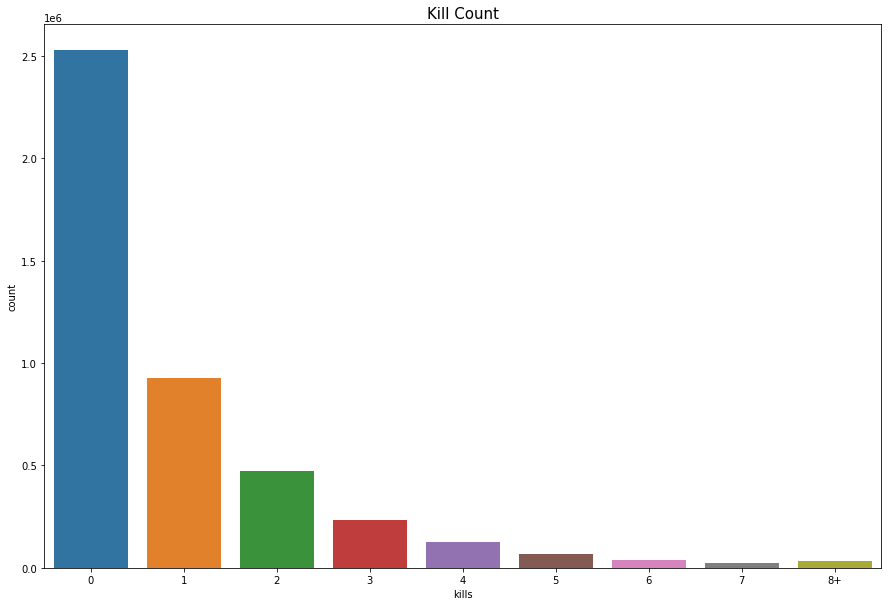

In [72]:
# 킬 카운트를 시각화 해보자.
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+' # 8+는 8킬 이상 그외 데이터셋으로 잡는다
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

-  대부분의 사람들은 1킬도 하지 못한다는걸 알 수 있다. 그렇다면 최소한 데미지라도 가하는지 확인해보자.

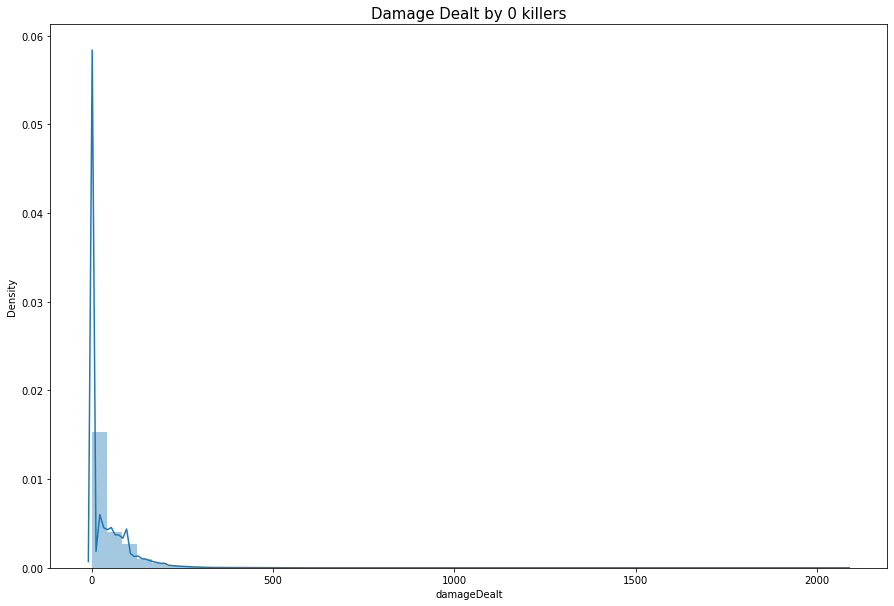

In [91]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

# 0 값을 가지고 있는 사람의 데이지
# 분산 plot 이기 때문에 sns로 사용
# sns 패키지는 많은 기능들을 제공 너무 많은 기능 보다는
# 아래 차트와 같은 sns 기능만 사용할것

# 0킬 인 사람들은 데이지도 0 값인 경우가 많지만, 다른 값들이 있다.

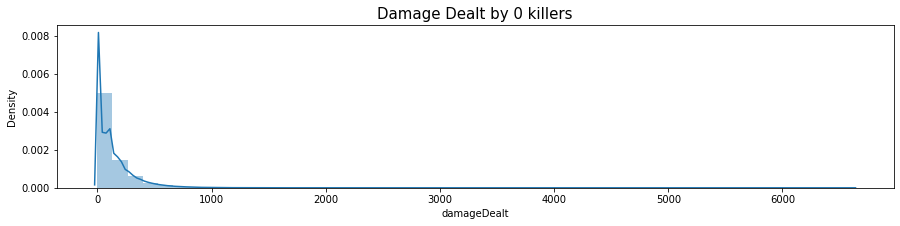

In [93]:


data = train.copy()
filed = 'damageDealt'
plt.figure(figsize=(15,3))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data[filed])
plt.show()




In [117]:
# 숫자 변수의 자료를 아래와 같이 그리고, 각 chart save


# data = train.copy()
# numtype = ['int32','int64','float32','float64']
# filed = [i for i in data.]
# plt.figure(figsize=(15,3))
# plt.title("Damage Dealt by 0 killers",fontsize=15)
# sns.distplot(data[filed])
# plt.show()

train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

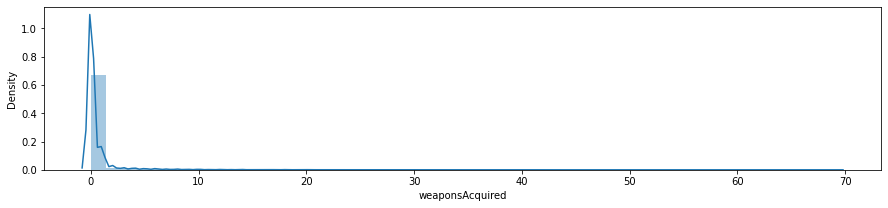

<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

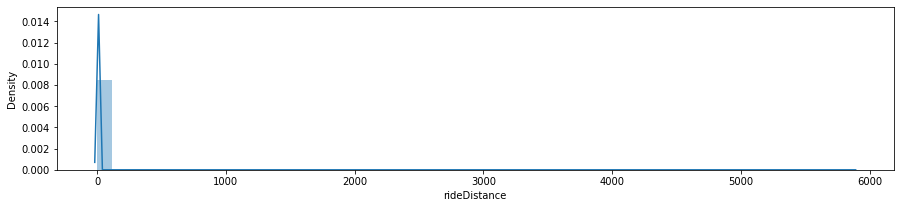

In [128]:
data = train.copy()
data = data[data['walkDistance']==0]
plt.figure(figsize=(15,3))

plt.title("",fontsize=15)
sns.distplot(data['weaponsAcquired'])
plt.show()

plt.figure(figsize=(15,3))
sns.distplot(data['rideDistance'])


In [135]:
# 이동거리가 하나도 없는 데이터 중에서 무기가 0개 이상인것
# 최소 0이지만  max 값이 있어서 
tmp = data[data['weaponsAcquired'] > 0]

#tmp[['weaponsAcquired','rideDistance']]

tmp[tmp['rideDistance']>=0.0005]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2907639,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.00,0,0,6,30,...,0,1277.0,0,0.0,0,0,0.0,29,0,0.4
4053449,33c6bbdeaf2e27,2fb25a6d123a70,a5a5aaacfb89f6,0,0,85.41,0,0,0,10,...,0,213.1,0,0.0,0,0,0.0,5,0,0.0


In [140]:
train[train['Id']=='2bf1d34142358b']


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2907639,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.0,0,0,6,30,...,0,1277.0,0,0.0,0,0,0.0,29,0,0.4


In [150]:
#움직이지 않았는데 무기를 소지한자

df= train[(train['weaponsAcquired']==0) & (train['walkDistance']==0)]
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0,0.0,0,0.0,0,0,0.0,0,0,0.0000
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0,0.0,0,0.0,0,0,0.0,0,847,0.0000
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,765,0.0000
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0,0.0,0,0.0,0,0,0.0,0,1510,0.0000
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0,0.0,0,0.0,0,0,0.0,0,0,0.1277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446779,dec9a10a058c9c,3c66fb620b3631,a83fe9ee429644,0,0,0.0,0,0,0,85,...,0,0.0,0,0.0,0,0,0.0,0,532,0.0000
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0,0.0,0,0.0,0,0,0.0,0,0,0.0000
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0,0.0,0,0.0,0,0,0.0,0,1363,0.0412
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0,0.0,0,0.0,0,0,0.0,0,916,0.0000


### VIF는 X 변수끼리의 상관성을 체크

### 필요한 병수만 추출함 - x 데이터 끼리의 강한 상관성을 확인하는 방법

### VIF 10 이상인 변수는 제거하는것을 권장함 - x 변수 제거 후 VIF 10 이상 안나올때 까지

### VIF 계속 확인 10 미만의 값이 나올때까지

### 다중공산성

### 전통적인 회귀분석 모형을 돌려줘야 VIF를 돌릴수 있다.

### 회귀 모형 평가, 데이터 건수가 작을떄 많이 쓴다.

### 다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

### (다중)공선성이 있으면:
- 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다
- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다

### (다중)공선성의 진단
- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [152]:
from statsmodels.formula.api import ols

In [171]:
df = train.copy()
model = ols('winPlacePerc ~ kills + vehicleDestroys + weaponsAcquired + assists + boosts + damageDealt + longestKill', df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           winPlacePerc   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 7.594e+05
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:20:55   Log-Likelihood:             6.8411e+05
No. Observations:             4446965   AIC:                        -1.368e+06
Df Residuals:                 4446957   BIC:                        -1.368e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1969      0.000   1091.346      0.000       0.197       0.197
kills              -0.0056      0.000    -38.638      0.000      -0.006      -0.005
vehicleDestroys     0.0054      0.001      5.023      0.000       0.003       0.007
weaponsAcquired     0.0461   4.48e-05   1027.918      0.000       0.046       0.046
assists             0.0241      0.000    129.220      0.000       0.024       0.024
boosts              0.0748   7.14e-05   1047.917      0.000       0.075       0.075
damageDealt      5.739e-05   1.33e-06     43.244      0.000    5.48e-05       6e-05
longestKill         0.0007   2.47e-06    289.909      0.000       0.001       0.001
==============================================================================
Omnibus:                   515510.938   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5319244.833
Skew:                           0.061   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

model.exog_names

['Intercept',
 'kills',
 'vehicleDestroys',
 'weaponsAcquired',
 'assists',
 'boosts',
 'damageDealt',
 'longestKill']

In [173]:
variance_inflation_factor(model.exog, 1)

5.226782527678813

In [174]:
variance_inflation_factor(model.exog, 2)

1.0115517461664056

In [175]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,kills,5.226783
1,vehicleDestroys,1.011552
2,weaponsAcquired,1.252391
3,assists,1.245777
4,boosts,1.550107
5,damageDealt,5.306645
6,longestKill,1.632887


In [164]:
model = ols('winPlacePerc ~ weaponsAcquired + walkDistance', df)

In [165]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           winPlacePerc   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 4.886e+06
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:12:41   Log-Likelihood:             1.5201e+06
No. Observations:             4446965   AIC:                        -3.040e+06
Df Residuals:                 4446962   BIC:                        -3.040e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1691      0.000   1148.598      0.000       0.169       0.169
weaponsAcquired     0.0257   3.95e-05    649.942      0.000       0.026       0.026
walkDistance        0.0002   8.19e-08   2219.379      0.000       0.000       0.000
==============================================================================
Omnibus:                   328677.793   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1502057.584
Skew:                           0.219   Prob(JB):                         0.00
Kurtosis:                       5.813   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 데미지조차 가하지 못하는 사람이 대부분이라는걸 알 수 있다.

- 그러면 데미지가 낮거나 킬수가 낮은 사람이 우승할수 있는지 알아보자

In [79]:
print("{}의 유저({:.4f}%)는 킬을 하지도 않고도 우승했다".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{}의 유저({:.4f}%)는 데미지를 가하지 않고 우승했다".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666의 유저(0.3748%)는 킬을 하지도 않고도 우승했다
4770의 유저(0.1073%)는 데미지를 가하지 않고 우승했다


- 16666의 유저(0.3748%)는 킬을 하지도 않고도 우승했다
- 4770의 유저(0.1073%)는 데미지를 가하지 않고 우승했다




- 우승한 횟수와 킬 수 간의 관계를 시각화를 해보자.

In [81]:
data['winPlacePerc'].describe()
# std 값이 평균에 모여 있다.
# 평균 값이나 50% 값이 비슷하다는것은, 튀는 값이 영향이 적다.


count    2.529721e+06
mean     3.703317e-01
std      2.814896e-01
min      0.000000e+00
25%      1.200000e-01
50%      3.214000e-01
75%      5.914000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64

In [85]:
train['kills'].corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [89]:
tmp = train[train['kills']<5]

tmp.corr()

# kills 와 winPlacePerc 의 값을 연관 분석,
# 아무래도 kills 값이 높을수록 winPlacePerc이 높아짐
# 그래도 kills == 0 이라도 winPlacePerc가 있음

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.290390,0.360381,0.236285,0.128945,0.211946,-0.264189,0.037415,0.240613,0.194833,...,0.179194,0.106454,0.008273,0.024143,0.005490,0.047793,0.277412,0.192700,0.024325,0.282289
boosts,0.290390,1.000000,0.460455,0.279918,0.248142,0.528740,-0.521452,0.001703,0.433798,0.344544,...,0.232920,0.334948,0.029515,0.112171,0.020053,0.073471,0.628830,0.420478,-0.008383,0.619411
damageDealt,0.360381,0.460455,1.000000,0.697216,0.472227,0.318945,-0.703315,0.048670,0.809804,0.695541,...,0.235456,0.133415,0.044985,0.034776,0.020895,0.060534,0.366352,0.300296,0.019485,0.411507
DBNOs,0.236285,0.279918,0.697216,1.000000,0.370017,0.226670,-0.553361,0.036259,0.658789,0.620150,...,0.266614,0.086186,0.031737,0.012479,0.090998,0.039620,0.228883,0.180827,0.009036,0.223320
headshotKills,0.128945,0.248142,0.472227,0.370017,1.000000,0.157743,-0.458778,0.017085,0.565367,0.480003,...,0.117065,0.056712,0.002525,0.024181,0.012592,0.019035,0.196317,0.156416,0.002447,0.223788
heals,0.211946,0.528740,0.318945,0.226670,0.157743,1.000000,-0.363266,-0.006428,0.281088,0.233592,...,0.223566,0.298581,0.021810,0.080743,0.038899,0.056079,0.420565,0.304627,-0.011707,0.414668
killPlace,-0.264189,-0.521452,-0.703315,-0.553361,-0.458778,-0.363266,1.000000,-0.017208,-0.815610,-0.806042,...,-0.249029,-0.232477,-0.056757,-0.089290,-0.040986,-0.062868,-0.568046,-0.491485,-0.001202,-0.701991
killPoints,0.037415,0.001703,0.048670,0.036259,0.017085,-0.006428,-0.017208,1.000000,0.030368,0.030190,...,0.008581,-0.029559,-0.005511,-0.005186,-0.040048,-0.009634,-0.000891,-0.006452,0.983946,0.007736
kills,0.240613,0.433798,0.809804,0.658789,0.565367,0.281088,-0.815610,0.030368,1.000000,0.871309,...,0.231334,0.102072,0.062115,0.038835,0.025682,0.057041,0.338566,0.276405,0.004843,0.390692
killStreaks,0.194833,0.344544,0.695541,0.620150,0.480003,0.233592,-0.806042,0.030190,0.871309,1.000000,...,0.208627,0.082212,0.056712,0.030629,0.029723,0.047411,0.278832,0.241269,0.006474,0.331108


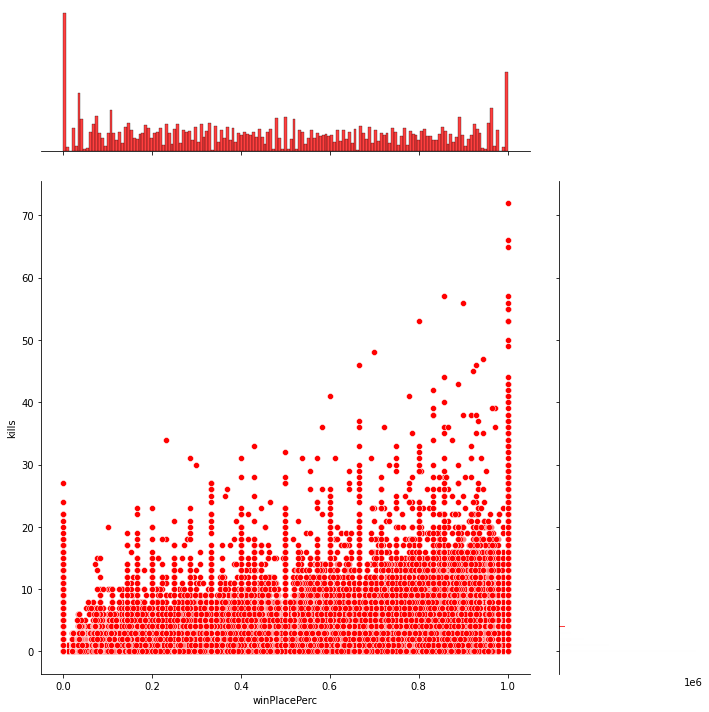

In [90]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="r")
plt.show()

# 한눈에 보는 방법은 상관관계를 통해 볼 수 있다
# 

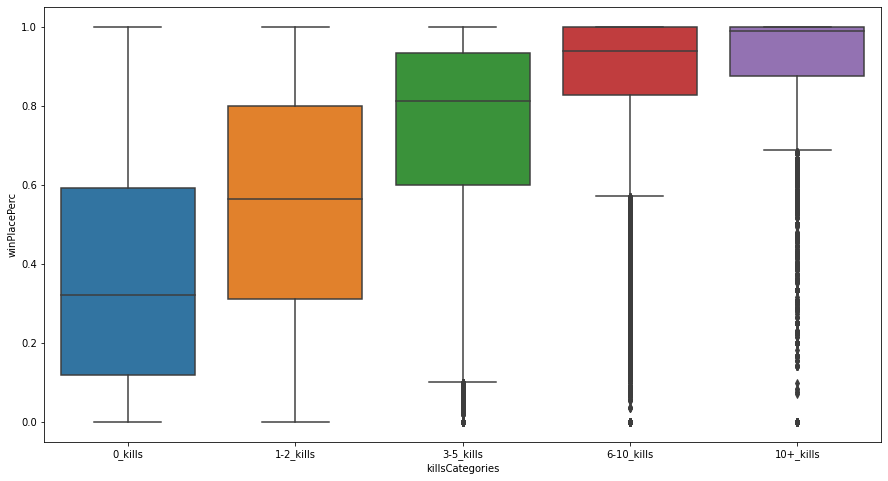

In [78]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [ ]:
print("평균적으로 유저는 {:.1f}m를 뛰며, 99%의 유저는 {}m 이하를 뛰었다. 반면 마라톤 챔피언은 {}m를 뛰었다.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

In [ ]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [ ]:
print("{}의 유저({:.4f}%)는 0미터를 걸었다. 이것이 의미하는 것은 유저가 발을 딛기 전에도 죽었다는 것이다.".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

In [ ]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

In [ ]:
print("평균적으로 유저는 {:.1f}m를 운전하며, 99%의 유저는 {}m 이하를 운전했다. 반면 최장거리 운전자는 {}m를 운전했다.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

In [ ]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [ ]:
print("{}의 유저({:.4f}%)는 0미터를 운전했다. 이 뜻은 그들이 아직 운전면허가 없다는 말이다.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

In [ ]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
plt.show()

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
print("유저는 평균적으로 {:.1f}m를 수영하며, 99%의 유저는 {}m이하를 수영했다. 반면 수영 챔피언은 {}m를 수영했다.".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

In [ ]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

In [ ]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

In [ ]:
print("평균적으로 유저는 {:.1f}개의 치료 아이템을 사용하며, 99%의 유저는 {}개 이하를 사용한다. 반면 가장 많이 치료 아이템을 사용한 유저는 {}개를 사용했다.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("평균적으로 유저는 {:.1f}개의 부스트 아이템을 사용하며, 99%의 유저는 {}개 이하를 사용한다. 반면 가장 많이 부스트 아이템을 사용한 유저는 {}개를 사용했다.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))